In [1]:
import os, zipfile, re
import requests
import pandas as pd
from datetime import datetime

In [2]:
main_path = '/hist'
if os.path.exists(main_path):
    os.chdir(main_path)
else:
    print('Não Foi possível abrir a pasta de trabalho: /hist')

In [28]:
intervalo = range(2000, 2024)
colunas = ['Data', 'BDI', 'CodNeg', 'TipoMercado', 'NomeResumido', 'Especificacao', 'Abertura', 'Maximo', 'Minimo', 'Ultimo', 'Volume']
df = pd.DataFrame(columns=colunas)

In [4]:
# Função para converter o formato de moeda para float

def prepareToFloat(value):
    value = value.strip()
    return value[:-2] + '.' + value[-2:]

## Só execute caso não haja arquivos .csv na pasta de Cotações Históricas

In [5]:
url = 'https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A'

for ano in range(2000, 2024):
    localUrl = f'{url}{ano}.ZIP'
    fileName = f'COTAHIST_A{ano}.ZIP'

    if not os.path.exists(fileName):
        print(localUrl)
        r = requests.get(localUrl, allow_redirects=True)
    
        with open(fileName, 'wb') as zipFile:
            zipFile.write(r.content)
            zipFile.close()

    try:
        zip_ref = zipfile.ZipFile(os.path.abspath(fileName))
        zip_ref.extractall() # extract file to dir
        zip_ref.close() # close file
    except:
        print (f'Não foi possível descompactar o arquivo {fileName}')

    os.remove(fileName) # delete zipped file

https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2000.ZIP
https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2001.ZIP
https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2002.ZIP
https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2003.ZIP


KeyboardInterrupt: 

In [ ]:
# Correção dos formatos dos nomes de arquivos
for name in os.listdir():
    match = re.match(r'^COTAHIST.A(\d{4}).*$', name)
    if match:
        newName = f'COTAHIST_A{match.group(1)}.txt'
        os.rename(name, newName)
        print (newName)

COTAHIST_A2015.txt
COTAHIST_A2014.txt
COTAHIST_A2016.txt
COTAHIST_A2002.txt
COTAHIST_A2003.txt
COTAHIST_A2017.txt
COTAHIST_A2013.txt
COTAHIST_A2007.txt
COTAHIST_A2006.txt
COTAHIST_A2012.txt
COTAHIST_A2004.txt
COTAHIST_A2010.txt
COTAHIST_A2011.txt
COTAHIST_A2005.txt
COTAHIST_A2001.txt
COTAHIST_A2008.txt
COTAHIST_A2020.txt
COTAHIST_A2021.txt
COTAHIST_A2009.txt
COTAHIST_A2023.txt
COTAHIST_A2022.txt
COTAHIST_A2019.txt
COTAHIST_A2000.txt
COTAHIST_A2018.txt


In [38]:
# Mapeamento dos dados para .csv

for name in os.listdir():
    if not os.path.isdir(name) and not name.endswith('.csv') :
        print(name)
        try:
            with open(name, 'r') as arq:    
                linhas = arq.readlines()
                with open(name[:-4] + '.csv', 'w') as csv:
                    strCol = ''
                    for col in colunas:
                        strCol += f'{col};'
                    csv.write(f'{strCol[:-1]}\n')

                    for linha in linhas[1:len(linhas[:-1])]:               
                        csv.write(linha[2:10].strip()) # Data
                        csv.write(';')
                        csv.write(linha[10:12].strip()) # BDI
                        csv.write(';')
                        csv.write(linha[12:24].strip()) # Codigo Negociacao
                        csv.write(';')
                        csv.write(linha[24:27].strip()) # Tipo de Mercado
                        csv.write(';')
                        csv.write(linha[27:39].strip()) # Nome Resumido
                        csv.write(';')
                        csv.write(linha[39:49].strip()) # Especificacao do Papel
                        csv.write(';')
                        csv.write(prepareToFloat(linha[56:69])) # Abertura
                        csv.write(';')
                        csv.write(prepareToFloat(linha[69:82])) # Maximo
                        csv.write(';')
                        csv.write(prepareToFloat(linha[82:95])) # Minimo
                        csv.write(';')
                        csv.write(prepareToFloat(linha[108:121])) # Ultimo
                        csv.write(';')
                        csv.write(linha[170:188]) # Volume
                        csv.write('\n')
        except:
            print(f'Não foi possível abrir o arquivo {name}')

        os.remove(name)   
    



## Pode executar sempre

In [29]:
for ano in intervalo:
    try:
        df = pd.concat([df, pd.read_csv(f'COTAHIST_A{ano}.csv', sep=';')], ignore_index=True)
        print(f'Ano {ano} OK')
    except Exception as err:
        print(err)
        print(f'Não foi possivel carregar {ano}')

Ano 2000 OK
Ano 2001 OK
Ano 2002 OK
Ano 2003 OK
Ano 2004 OK
Ano 2005 OK
Ano 2006 OK
Ano 2007 OK
Ano 2008 OK
Ano 2009 OK
Ano 2010 OK
Ano 2011 OK
[Errno 2] No such file or directory: 'COTAHIST_A2012.csv'
Não foi possivel carregar 2012
Ano 2013 OK
[Errno 2] No such file or directory: 'COTAHIST_A2014.csv'
Não foi possivel carregar 2014
Ano 2015 OK
Ano 2016 OK
Ano 2017 OK
Ano 2018 OK
Ano 2019 OK
Ano 2020 OK
Ano 2021 OK
Ano 2022 OK
Ano 2023 OK


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11910936 entries, 0 to 11910935
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Data           object 
 1   BDI            object 
 2   CodNeg         object 
 3   TipoMercado    object 
 4   NomeResumido   object 
 5   Especificacao  object 
 6   Abertura       float64
 7   Maximo         float64
 8   Minimo         float64
 9   Ultimo         float64
 10  Volume         object 
dtypes: float64(4), object(7)
memory usage: 999.6+ MB


In [30]:
df = df[['Data', 'CodNeg', 'Abertura', 'Minimo', 'Maximo', 'Ultimo', 'Volume']].copy()

In [31]:
df_2023 = df[df['Data'] >= 20230101]
df_2023['Diferenca'] = df_2023['Ultimo'] - df_2023['Abertura']
grouped_df = df_2023.groupby('CodNeg')['Diferenca'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Diferenca', ascending=False)

/var/folders/mq/07ht7frx6vn8rjnw4vfpptvr0000gp/T/ipykernel_1698/849851833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Diferenca'] = df_2023['Ultimo'] - df_2023['Abertura']


In [32]:
sorted_df[sorted_df['CodNeg'].str.slice(stop=4) != 'IBOV'].iloc[:20]                                                                

,CodNeg,Diferenca
31141,FLRP11,579.39
35011,HUSI11,307.67
55110,PQDP11,259.72
46311,MOAR3,257.54
31095,FDXB34,222.56
49670,NUTR3F,141.93
36606,IGBR3,110.77
11612,BICE11,105.75
25585,DPRO11,102.51
42784,LMTB34,96.19


## Definição do ativo a ser verificado

- BLCA11
- NEWU11
- BBVH12
- HBRH11
- PETR4
- LMTB34

In [33]:
def preparaAtivo(ativo):
    df_ativo = df[df['CodNeg'] == ativo].copy()
    df_ativo['Amanha'] = df_ativo['Ultimo'].shift(-1)
    df_ativo['Alvo'] = (df_ativo['Amanha'] > df_ativo['Ultimo']).astype(int)
    return df_ativo


In [34]:
df_NEWU11 = preparaAtivo('NEWU11')
df_NEWU11

,Data,CodNeg,Abertura,Minimo,Maximo,Ultimo,Volume,Amanha,Alvo
5705199,20200323,NEWU11,57.50,51.40,57.50,51.40,53230,55.00,1
5705200,20200324,NEWU11,58.00,55.00,58.00,55.00,325900,55.00,0
5705201,20200325,NEWU11,51.00,51.00,55.00,55.00,295501,52.12,0
5705202,20200326,NEWU11,55.00,50.88,61.99,52.12,185405,52.13,1
5714770,20200330,NEWU11,52.12,52.12,58.00,52.13,566788,55.00,1
...,...,...,...,...,...,...,...,...,...
11025517,20230612,NEWU11,69.00,68.99,69.00,69.00,110399,69.00,0
11027225,20230613,NEWU11,67.62,66.98,69.00,69.00,177064,69.90,1
11028936,20230614,NEWU11,68.95,68.01,69.90,69.90,8849842,69.99,1
11030848,20230615,NEWU11,69.90,67.42,69.99,69.99,9871469,70.00,1


## Contrução do Modelo de Predição

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df_NEWU11.iloc[:-100]
test = df_NEWU11.iloc[-100:]

predictors = ['Ultimo', 'Volume', 'Abertura', 'Maximo', 'Minimo']
model.fit(train[predictors], train['Alvo'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [37]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [38]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [39]:
preds

10861868    0
10863361    0
10865066    0
10866725    0
10870099    0
           ..
11025517    0
11027225    0
11028936    0
11030848    0
11032427    0
Length: 100, dtype: int64

In [40]:
precision_score(test['Alvo'], preds)

0.75

In [41]:
combined = pd.concat([test['Alvo'], preds], axis=1)

<AxesSubplot: >

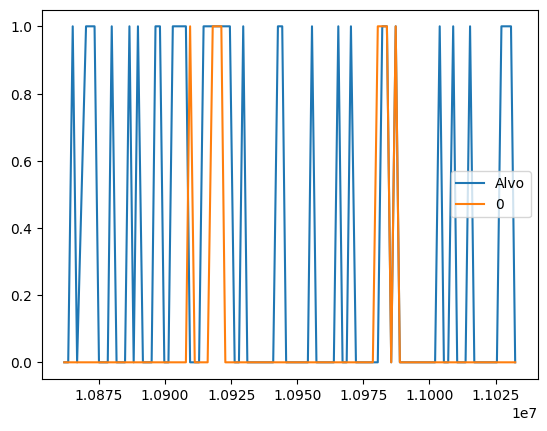

In [42]:
combined.plot()